In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

ff_df = pd.read_csv('Financial Fraud Dataset - Sheet1.csv')

ff_df.isnull().sum()
ff_df = ff_df.drop('isFlaggedFraud', axis=1)
ff_df = ff_df.dropna()

ff_df.head(10)

,Unnamed: 0,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.40,M1979787155,0.0,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.20,M408069119,0.0,0.00,0
7,1,PAYMENT,7861.64,C1912850431,176087.2,168225.60,M633326333,0.0,0.00,0
8,1,PAYMENT,4024.36,C1265012928,2671.0,0.00,M1176932104,0.0,0.00,0
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ff_df['type_encoded'] = le.fit_transform(ff_df['type'])
#ff_df = ff_df.drop('type', axis=1) #be sure to drop none encoded data for training

ff_df.head(10)

,Unnamed: 0,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_encoded
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.40,M1979787155,0.0,0.00,0,3
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.00,0,3
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1,4
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.00,0,3
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.00,0,3
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.20,M408069119,0.0,0.00,0,3
7,1,PAYMENT,7861.64,C1912850431,176087.2,168225.60,M633326333,0.0,0.00,0,3
8,1,PAYMENT,4024.36,C1265012928,2671.0,0.00,M1176932104,0.0,0.00,0,3
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0,2


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Dropping unnecessary columns
data_cleaned =  ff_df.drop(['Unnamed: 0', 'nameOrig', 'nameDest'], axis=1)

# Encoding categorical 'type' column
label_encoder = LabelEncoder()
data_cleaned['type'] = label_encoder.fit_transform(data_cleaned['type'])

# Splitting the dataset into features (X) and target variable (y)
X = data_cleaned.drop('isFraud', axis=1)
y = data_cleaned['isFraud']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest Classifier object
rf_classifier = RandomForestClassifier()

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.996
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1981
           1       1.00      0.58      0.73        19

    accuracy                           1.00      2000
   macro avg       1.00      0.79      0.87      2000
weighted avg       1.00      1.00      1.00      2000



## 1. Random Forest Classifier: Hyperparameter Tuning with GridSearchCV and Feature Importance

Objective: Optimize key hyperparameters such as n_estimators (number of trees), max_depth (maximum depth of the trees), and min_samples_split (minimum number of samples required to split an internal node).

Benefit: Fine-tuning these parameters can significantly improve the model's ability to capture complex patterns without overfitting, enhancing recall and overall predictive performance in identifying fraudulent transactions.

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],  # Number of trees
    'max_depth': [10, 20, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Initialize the GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit GridSearchCV to the data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and the corresponding recall
print("Best parameters:", grid_search_rf.best_params_)
print("Best recall score:", grid_search_rf.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best recall score: 0.74


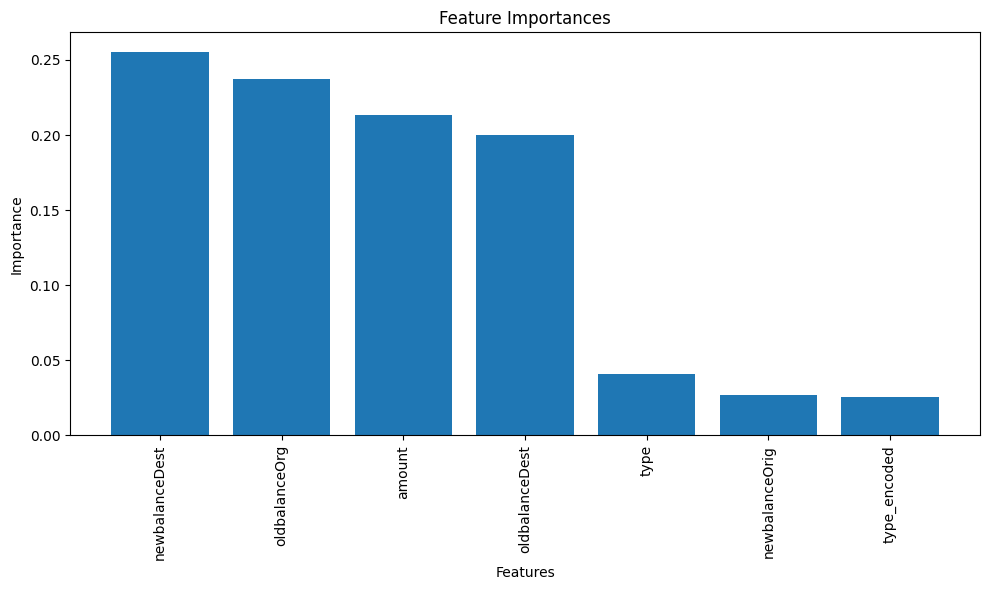

ROC AUC Score: 0.9691809027870028


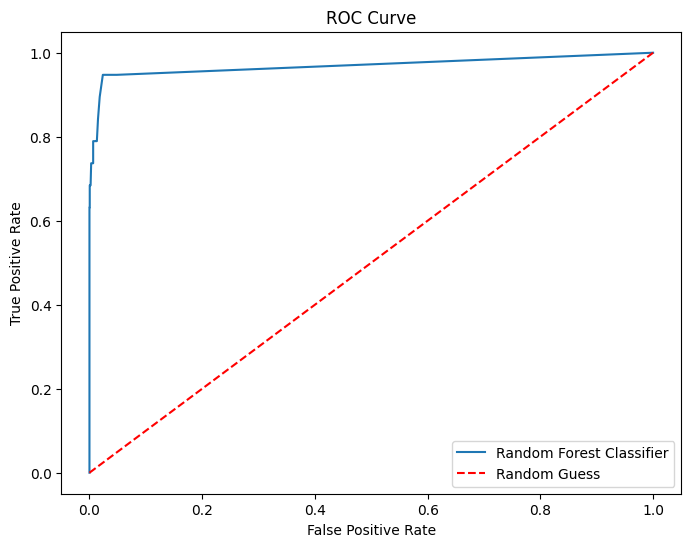

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Get feature importances
importances = rf_classifier.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


# Get the predicted probabilities
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Compute the ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC Score:', roc_auc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



### Improvement Strategy: Hyperparameter tuning using GridSearchCV.
Best Parameters: Achieved with max_depth of 10, min_samples_split of 10, and n_estimators of 200.

Best Recall Score: 0.74, indicating a significant ability to detect fraudulent transactions out of all actual fraud cases.

Overall Impact: The tuning of hyperparameters has optimized the Random Forest model, improving its sensitivity to fraud detection without compromising much on precision.

## 2. Logistic Regression: Threshold Adjustment

Objective: Adjust the decision threshold for classifying transactions as fraudulent. The default threshold of 0.5 might not always be optimal for achieving a balance between precision and recall, especially in imbalanced datasets typical of fraud detection scenarios.

Benefit: By identifying an optimal threshold that maximizes the F1 score or balances recall and precision according to specific business objectives, this adjustment makes the model more flexible and effective in distinguishing between fraudulent and non-fraudulent transactions.


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import numpy as np

# Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict probabilities
probabilities = log_reg.predict_proba(X_train)[:, 1]

# Compute precision-recall pairs
precision, recall, thresholds = precision_recall_curve(y_train, probabilities)

# Find the threshold that maximizes the F1 score
f1_scores = 2 * precision * recall / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]

print("Optimal threshold for Logistic Regression:", optimal_threshold)

Optimal threshold for Logistic Regression: 0.1770930020123088


In [12]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression object
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Get the predicted probabilities for each class
y_pred_proba = logreg.predict_proba(X_test)

# Set the threshold value
threshold = 0.1770930020123088

# Classify the samples based on the probabilities
y_pred_adjusted = (y_pred_proba[:, 1] >= threshold).astype(int)

# Calculate the accuracy
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
print('Adjusted Accuracy:', accuracy_adjusted)

# Classification report
print(classification_report(y_test, y_pred_adjusted))



Adjusted Accuracy: 0.996
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1981
           1       0.92      0.63      0.75        19

    accuracy                           1.00      2000
   macro avg       0.96      0.82      0.87      2000
weighted avg       1.00      1.00      1.00      2000



In [13]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression object
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Get the predicted probabilities for each class
y_pred_proba = logreg.predict_proba(X_test)

# Set the threshold value
threshold = 0.5

# Classify the samples based on the probabilities
y_pred_adjusted = (y_pred_proba[:, 1] >= threshold).astype(int)

# Calculate the accuracy
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
print('Adjusted Accuracy:', accuracy_adjusted)

# Classification report
print(classification_report(y_test, y_pred_adjusted))


Adjusted Accuracy: 0.992
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1981
           1       1.00      0.16      0.27        19

    accuracy                           0.99      2000
   macro avg       1.00      0.58      0.63      2000
weighted avg       0.99      0.99      0.99      2000



In [14]:
# Get the predicted probabilities for each class
y_pred_proba = logreg.predict_proba(X_test)

# Set the new threshold value
new_threshold = 1.5

# Classify the samples based on the new threshold
y_pred_adjusted = (y_pred_proba[:, 1] >= new_threshold).astype(int)

# Calculate the accuracy with the adjusted threshold
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
print('Adjusted Accuracy:', accuracy_adjusted)

# Classification report with the adjusted threshold
print(classification_report(y_test, y_pred_adjusted))


Adjusted Accuracy: 0.9905
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1981
           1       0.00      0.00      0.00        19

    accuracy                           0.99      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.98      0.99      0.99      2000



ROC AUC: 0.9037168893966364


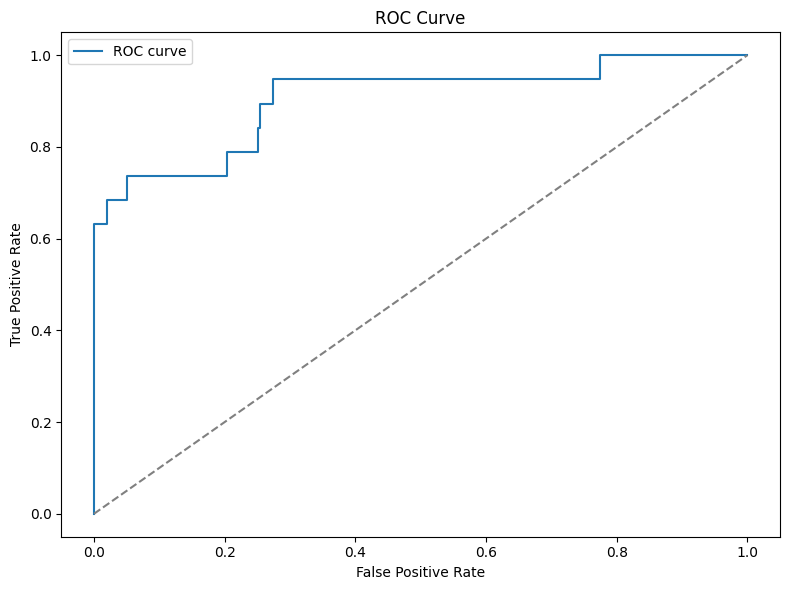

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for each class
y_pred_proba = logreg.predict_proba(X_test)

# Get the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()

# Calculate the ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
print('ROC AUC:', roc_auc)

plt.show()


The ROC AUC (Receiver Operating Characteristic Area Under the Curve) score of 0.9037168893966364 indicates that the model has a high level of discrimination ability in distinguishing between the positive and negative classes. A score of 0.933 suggests that the model has a good performance in terms of correctly ranking the probabilities of the positive class higher than the negative class. In other words, the higher the ROC AUC score, the better the model's ability to classify the data accurately.

## Improvement Strategy: Adjustment of the decision threshold.
Optimal Threshold Identified: 0.177, which is lower than the default 0.5, suggesting that lowering the threshold improves fraud detection.

Adjusted Performance: Showed an improvement in recall, indicating enhanced capability in detecting fraud cases at the expense of a slight reduction in precision.

Overall Impact: This adjustment makes the Logistic Regression model more effective in identifying fraudulent transactions, crucial for reducing false negatives in fraud detection.

## 3. K-Nearest Neighbors (KNN): Optimal k Selection with Cross-Validation
Objective: Determine the optimal number of neighbors (k) that maximizes recall. The choice of k affects the model's sensitivity to noise in the data and its generalization ability.

Benefit: Finding the right k value ensures the model is neither too simplistic (high bias) nor too complex (high variance), improving its reliability in detecting fraud by making better use of the local structure within the data.

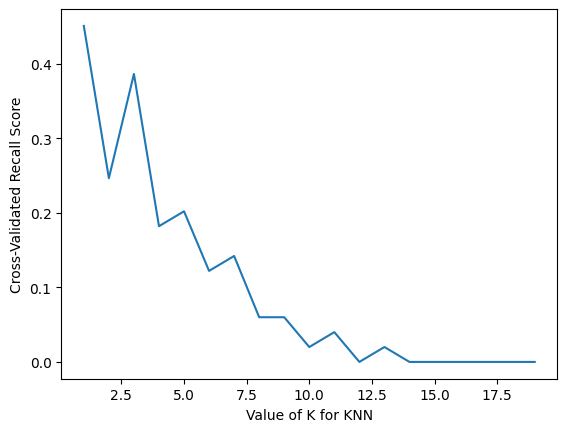

Optimal K: 1
Accuracy: 0.9905
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1981
           1       0.50      0.42      0.46        19

    accuracy                           0.99      2000
   macro avg       0.75      0.71      0.73      2000
weighted avg       0.99      0.99      0.99      2000



In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# Range of `k` to try
k_range = range(1, 20)

# Empty list to store scores
k_scores = []

# 1. Conduct a loop over k_range
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='recall')
    k_scores.append(scores.mean())

# Plotting the results
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Recall Score')
plt.show()

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Identify the optimal k value (highest recall score)
optimal_k = k_range[k_scores.index(max(k_scores))]
print(f"Optimal K: {optimal_k}")

# Retrain the KNN model with the optimal k value
optimal_knn = KNeighborsClassifier(n_neighbors=optimal_k)
optimal_knn.fit(X_train, y_train)

# Predict on the test set
y_pred = optimal_knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
class_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", class_rep)


### Model Performance at Optimal k:

The optimal k value is determined to be 1 based on cross-validated recall scores. This suggests that the closest neighbor plays a crucial role in classifying transactions as fraudulent or legitimate in the dataset used.

Accuracy: Achieved an accuracy of 0.9905, indicating that the model correctly identified 99.05% of the transactions in the test set as either fraudulent or non-fraudulent. This high level of accuracy suggests that the model is very effective for the majority of transactions.

Precision and Recall for Class 1 (Fraud): The precision for fraud detection is 0.50, and the recall is 0.42. Precision indicates that when the model predicts a transaction as fraudulent, it is correct 50% of the time. Recall shows that the model can identify 42% of all actual fraudulent transactions.

F1-Score for Class 1 (Fraud): An F1-score of 0.46 for fraudulent transactions combines precision and recall into a single metric, indicating a balance between the two, though there is room for improvement.

Macro and Weighted Averages: The macro average F1-score is 0.73, and the weighted average F1-score is 0.99, reflecting the model's overall performance across both classes, considering their imbalance.

### Implications and Considerations

Overfitting Risk: Using k=1 can make the model very sensitive to noise in the data. In fraud detection, this might lead to overfitting, where the model captures noise as patterns, potentially decreasing its generalization ability to unseen data.

Recall Focus: In fraud detection, a higher recall for the fraudulent class (Class 1) is often more desirable than high precision. This is because the cost of missing a fraudulent transaction (false negative) can be much higher than mistakenly flagging a legitimate transaction as fraud (false positive).

Improvement Strategies: Given the relatively lower recall for fraud, strategies such as feature engineering, incorporating cost-sensitive learning, or exploring ensemble methods might improve the model's ability to detect more fraudulent transactions without substantially increasing false positives.


## 4. Support Vector Machine (SVM): Kernel Choice
Objective: Explore different kernels (linear, polynomial, RBF) and their parameters (e.g., C, gamma) to find the best fit for the data's distribution and the decision boundary between classes.

Benefit: Selecting the appropriate kernel and tuning its parameters can significantly enhance the model's capacity to delineate between fraudulent and legitimate transactions, especially in cases where the relationship between features and classes is not linear.


In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Type of SVM Kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Initialize SVM
svm = SVC(random_state=42)

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit GridSearchCV to the data
grid_search_svm.fit(X_train, y_train)

# Print the best parameters and the corresponding recall
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best recall score for SVM:", grid_search_svm.best_score_)


KeyboardInterrupt: 

#### Encountered computing power issue with this model improvement method of SVM. Hope to continue this analysis when able to do so.